In [1]:
#IMPOORTING LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#!pip install WordCloud
#!pip install torch

# !pip install transformers


In [3]:
import matplotlib.pyplot as plt #manipulate elements of a figure, such as creating a figure,creating a plotting area, plotting lines, adding plot labels, etc.

import seaborn as sns # helps data visualization
from wordcloud import WordCloud # text data representation in which the size of each word indicates its frequency or importance.
import torch # provides algorith for deep learning 
from sklearn.model_selection import train_test_split#splits data arrays into two subsets:training and testing data
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional,Dropout

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer

In [4]:
#Loading data
test_data = pd.read_csv("./emotionNLP/test.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
train_data = pd.read_csv("./emotionNLP/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
validation_data = pd.read_csv("./emotionNLP/val.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Validation : ", validation_data.shape)



Train :  (16000, 2)
Test :  (2000, 2)
Validation :  (2000, 2)


In [5]:
train_data.head()


,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


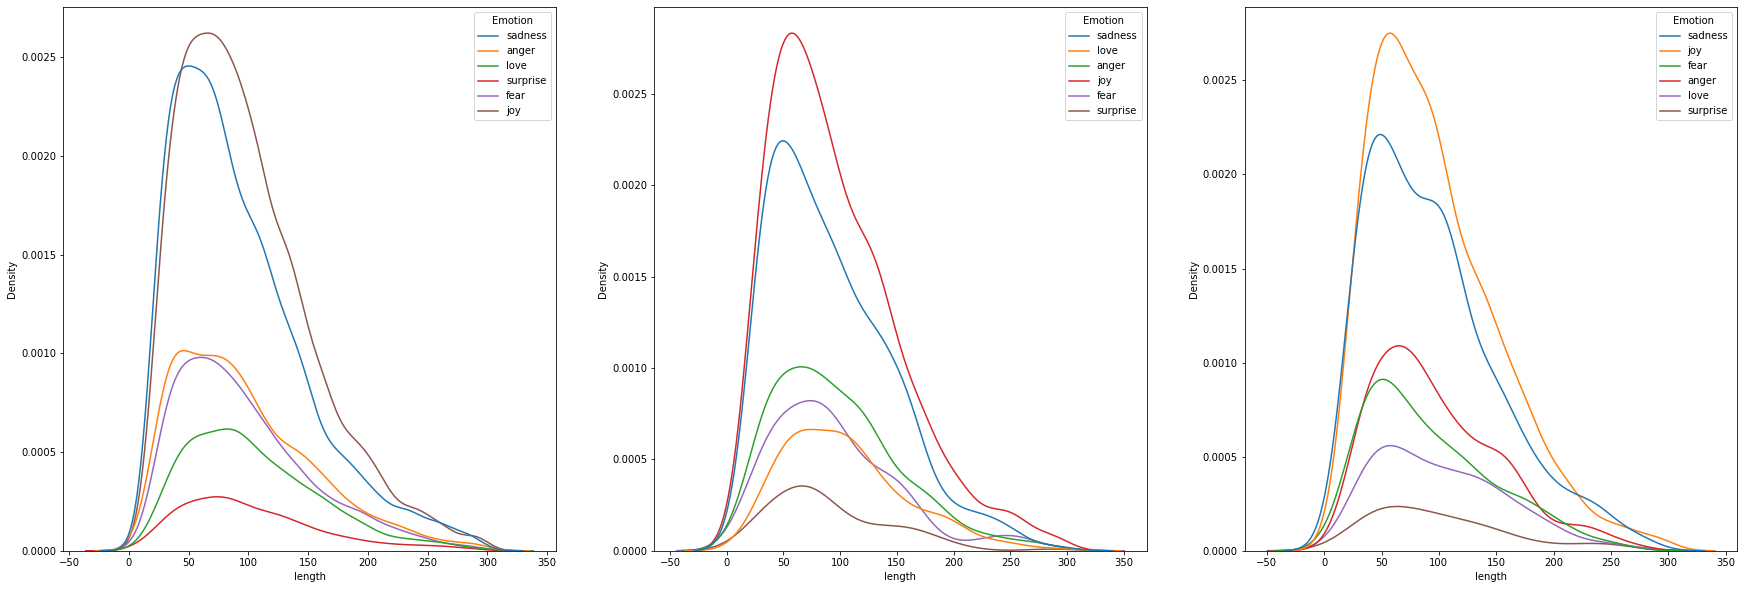

In [6]:
dataset = {'Train Data': train_data, 'Validation Data': validation_data, 'Test Data': test_data}
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i, df in enumerate(dataset.values()):
    df2 = df.copy()
    df2['length'] = [len(x) for x in df2['Comment']]
    sns.kdeplot(data=df2,x='length',hue='Emotion', ax=ax[i])
plt.show()


In [7]:
data1 = pd.concat([train_data,test_data, validation_data])

In [19]:
data1 = df.drop_duplicates(keep="first") # Drop duplicated data and reindex the data
df_new = df.reset_index(drop=True)
df_new.shape


(2000, 2)

In [8]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [9]:

# Words Cloud for each emotion

emotions_list = train_data['Emotion'].unique()
emotions_list



array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

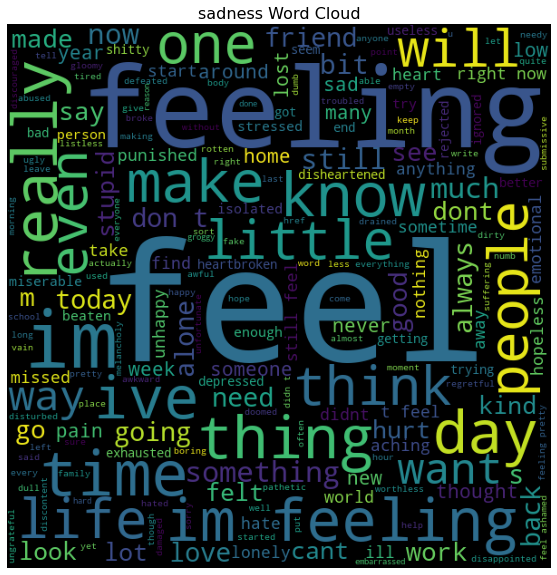

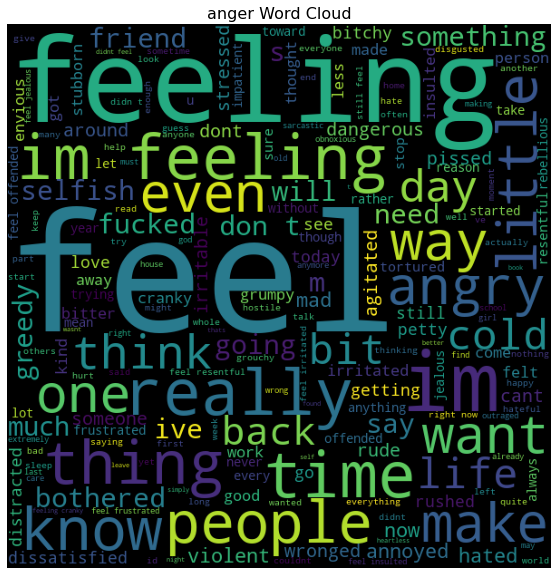

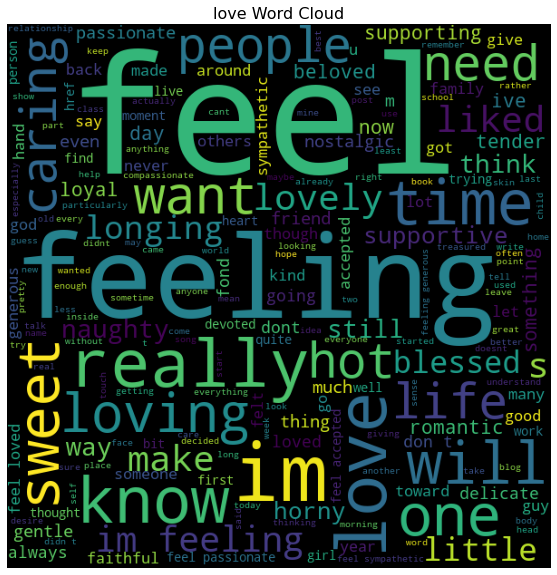

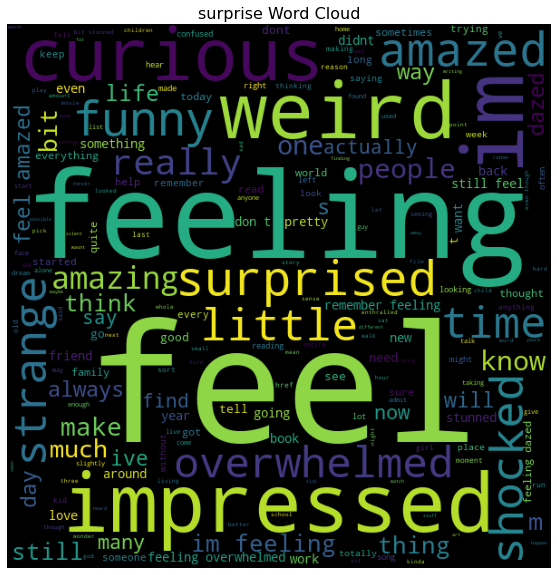

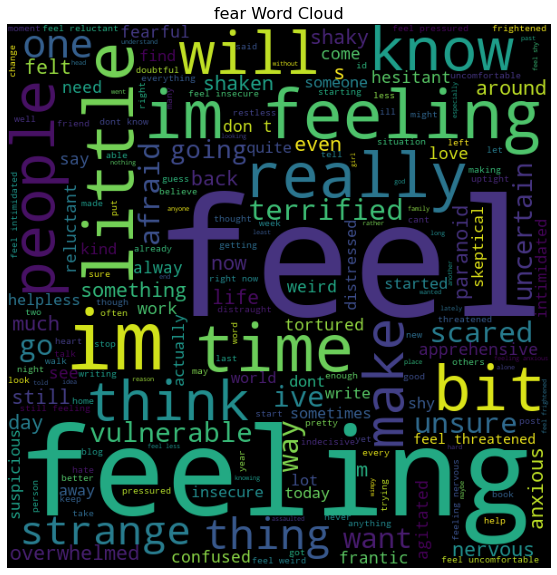

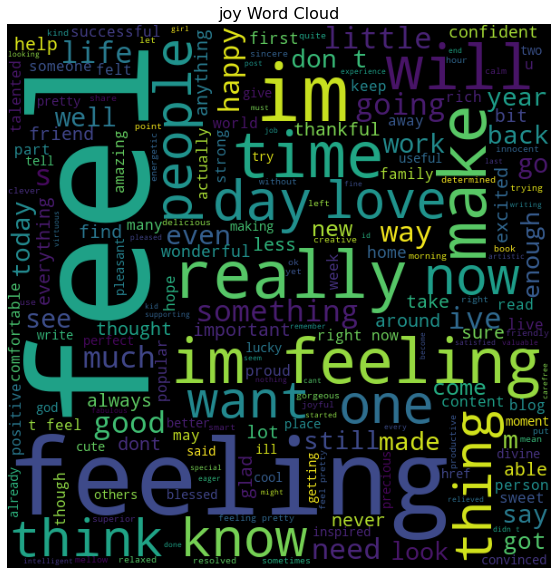

In [10]:
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)


In [11]:

# Preprocessing
# Label Encoding

lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])
test_data['Emotion'] = lb.fit_transform(test_data['Emotion'])
validation_data['Emotion'] = lb.fit_transform(validation_data['Emotion'])



In [12]:
train_data.head()


,Comment,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


In [13]:
train_data['length'] = [len(x) for x in train_data['Comment']] # to see if length is corelated to emotion 
train_data.head()


,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [14]:

# Removing unrelevent stopwords and chars

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prativapandey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
max_len=train_data['length'].max()
max_len


300

In [37]:
x_train = text_cleaning(train_data, "Comment")
x_test = text_cleaning(test_data, "Comment")
x_val = text_cleaning(validation_data, "Comment")

(16000, 300)
(2000, 300)
(2000, 300)


In [81]:
vocabSize = 11000

In [82]:
from tensorflow.keras.preprocessing.text import one_hot
def text_cleaning(df, column):
    """Removing unrelevent chars, Stemming and padding"""
    stemmer = PorterStemmer()
    corpus = []
    
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocabSize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    print(pad.shape)
    return pad


In [55]:
x_train = text_cleaning(train_data, "Comment")
x_test = text_cleaning(test_data, "Comment")
x_val = text_cleaning(validation_data, "Comment")

(16000, 300)
(2000, 300)
(2000, 300)


In [56]:
y_train = train_data["Emotion"]
y_test = test_data["Emotion"]
y_val = validation_data["Emotion"]


In [57]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


In [58]:

#Model building


model = Sequential()
model.add(Embedding(input_dim=vocabSize,output_dim=150,input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 150)          1650000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 150)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               142848    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [59]:
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [60]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=64,
                 validation_data=(x_val,y_val), verbose=1, callbacks=[callback])


Epoch 1/10
250/250 [==============================] - 71s 278ms/step - loss: 1.5401 - accuracy: 0.3868 - val_loss: 1.3358 - val_accuracy: 0.5345
Epoch 2/10
250/250 [==============================] - 72s 287ms/step - loss: 0.8555 - accuracy: 0.7076 - val_loss: 0.6004 - val_accuracy: 0.8145
Epoch 3/10
250/250 [==============================] - 96s 383ms/step - loss: 0.4091 - accuracy: 0.8677 - val_loss: 0.3982 - val_accuracy: 0.8595
Epoch 4/10
250/250 [==============================] - 86s 345ms/step - loss: 0.2517 - accuracy: 0.9177 - val_loss: 0.3635 - val_accuracy: 0.8770
Epoch 5/10
250/250 [==============================] - 84s 337ms/step - loss: 0.1845 - accuracy: 0.9401 - val_loss: 0.3443 - val_accuracy: 0.8885
Epoch 6/10
250/250 [==============================] - 86s 343ms/step - loss: 0.1463 - accuracy: 0.9513 - val_loss: 0.3746 - val_accuracy: 0.8795
Epoch 7/10
250/250 [==============================] - 86s 342ms/step - loss: 0.1159 - accuracy: 0.9604 - val_loss: 0.3555 - val_ac

In [61]:
model.evaluate(x_val,y_val,verbose=1)

63/63 [==============================] - 4s 64ms/step - loss: 0.3443 - accuracy: 0.8885


[0.34425869584083557, 0.8884999752044678]

In [62]:
model.evaluate(x_test,y_test,verbose=1)

63/63 [==============================] - 4s 64ms/step - loss: 0.3687 - accuracy: 0.8805


[0.3687211871147156, 0.8805000185966492]

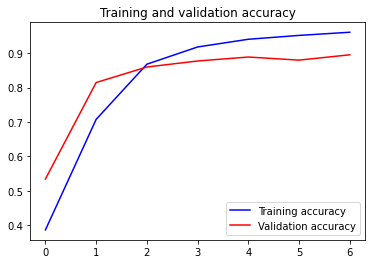

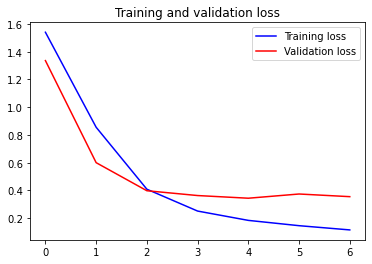

In [63]:
accuracy = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'b', label='Training accuracy')
plt.plot(epochs,val_acc,'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'b', label='Training loss')
plt.plot(epochs,val_loss,'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [64]:
def sentence_cleaning(sentence):
    """Pre-processing sentence for prediction"""
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocabSize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    return pad


In [80]:
sentences = [
            "He was so rude that I got accepted to this new position",
            "This is so rude, how can he behave like that?",
            "He feels like he is all alone",
            "She has been really caring and loving these days"
    
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")


He was so rude that I got accepted to this new position
anger : 0.7785734534263611


This is so rude, how can he behave like that?
anger : 0.9766750335693359


He feels like he is all alone
sadness : 0.9828299880027771


She has been really caring and loving these days
love : 0.9175330996513367


